In [1]:
conda activate tensorflow_environment


Note: you may need to restart the kernel to use updated packages.


### Set up file structure

In [2]:
import glob
import random

mask_list = glob.glob('./all_images_clean/mask/*.png')
no_mask_list = glob.glob('./all_images_clean/no_mask/*.png')
incorrect_mask_list = glob.glob('./all_images_clean/incorrect_mask/*.png')
random.shuffle(mask_list)
random.shuffle(no_mask_list)
random.shuffle(incorrect_mask_list)

In [3]:
len(mask_list)

3810

In [4]:
len(no_mask_list)

1114

In [5]:
len(incorrect_mask_list)

148

In [6]:
import os
#delete all files in directories so only desired images in directories
cat = ['mask', 'no_mask', 'incorrect_mask']
dat = ['test', 'train', 'validation']
for c in cat:
    for d in dat:
        files = glob.glob('./data_3class/' + d + '/' + c + '/*.png')
        for f in files:
            os.remove(f)

In [7]:
import shutil

#split mask images into train/test/validation files
for file in mask_list[0:(len(mask_list)*3//5)]:
    shutil.copy(file, './data_3class/train/mask')
for file in mask_list[(len(mask_list)*3//5):(len(mask_list)*4)//5]:
    shutil.copy(file, './data_3class/test/mask')
for file in mask_list[(len(mask_list)*4)//5:len(mask_list)]:
    shutil.copy(file, './data_3class/validation/mask')
    
#split no_mask images into train/test/validation files
for file in no_mask_list[0:(len(no_mask_list)*3//5)]:
    shutil.copy(file, './data_3class/train/no_mask')
for file in no_mask_list[(len(no_mask_list)*3//5):(len(no_mask_list)*4)//5]:
    shutil.copy(file, './data_3class/test/no_mask')
for file in no_mask_list[(len(no_mask_list)*4)//5:len(no_mask_list)]:
    shutil.copy(file, './data_3class/validation/no_mask')
    
#split incorrect_mask images into train/test/validation files
for file in incorrect_mask_list[0:(len(incorrect_mask_list)*3//5)]:
    shutil.copy(file, './data_3class/train/incorrect_mask')
for file in incorrect_mask_list[(len(incorrect_mask_list)*3//5):(len(incorrect_mask_list)*4)//5]:
    shutil.copy(file, './data_3class/test/incorrect_mask')
for file in incorrect_mask_list[(len(incorrect_mask_list)*4)//5:len(incorrect_mask_list)]:
    shutil.copy(file, './data_3class/validation/incorrect_mask')    

In [8]:
mask_train_len = len(glob.glob('./data_3class/train/mask/*.png'))
mask_train_len

2286

In [9]:
len(glob.glob('./data_3class/test/mask/*.png'))

762

In [10]:
mask_val_len = len(glob.glob('./data_3class/validation/mask/*.png'))
mask_val_len

762

In [11]:
no_mask_train_len = len(glob.glob('./data_3class/train/no_mask/*.png'))
no_mask_train_len

668

In [12]:
len(glob.glob('./data_3class/test/no_mask/*.png'))

223

In [13]:
no_mask_val_len = len(glob.glob('./data_3class/validation/no_mask/*.png'))
no_mask_val_len

223

In [14]:
incorrect_mask_train_len = len(glob.glob('./data_3class/train/incorrect_mask/*.png'))
incorrect_mask_train_len

88

In [15]:
len(glob.glob('./data_3class/test/incorrect_mask/*.png'))

30

In [16]:
incorrect_mask_val_len = len(glob.glob('./data_3class/validation/incorrect_mask/*.png'))
incorrect_mask_val_len

30

In [17]:
incorrect_increase_factor = (mask_train_len//incorrect_mask_train_len)-1
incorrect_increase_factor

24

In [18]:
no_increase_factor = (mask_train_len//no_mask_train_len)-1
no_increase_factor

2

### Augment images in incorrect_mask

In [19]:
#create a list of images to augment -train/incorrect_mask and validation/incorrect_mask (and no_mask as well)
from PIL import Image
import glob

incorrect_mask_train = []
for filename in glob.glob('./data_3class/train/incorrect_mask/*.png'): 
    im=Image.open(filename)
    incorrect_mask_train.append(im)
    
incorrect_mask_validation = []
for filename in glob.glob('./data_3class/validation/incorrect_mask/*.png'): 
    im=Image.open(filename)
    incorrect_mask_validation.append(im)
    
incorrect_mask_test = []
for filename in glob.glob('./data_3class/test/incorrect_mask/*.png'): 
    im=Image.open(filename)
    incorrect_mask_test.append(im)
    
no_mask_train = []
for filename in glob.glob('./data_3class/train/no_mask/*.png'): 
    im=Image.open(filename)
    no_mask_train.append(im)
    
no_mask_validation = []
for filename in glob.glob('./data_3class/validation/no_mask/*.png'): 
    im=Image.open(filename)
    no_mask_validation.append(im)
    
no_mask_test = []
for filename in glob.glob('./data_3class/test/no_mask/*.png'): 
    im=Image.open(filename)
    no_mask_test.append(im)

In [20]:
#function to convert an image to numpy_array
from PIL import Image
import numpy as np
from skimage import transform

def convert_img_to_numpy(img):
   '''takes in image and returns numpy array
   '''
   np_image = np.array(img).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [21]:
#create instance of ImageDataGenerator to augment images
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.4,1.0],
    zoom_range=[0.5,1.0])
#rotation_range=20,


C:\Users\ntrin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ntrin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ntrin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ntrin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [22]:
# add augmented images to incorrect_mask (x19) and no_mask (x4) train and validate files
for img in incorrect_mask_train:
    try:
        it = datagen.flow(convert_img_to_numpy(img), batch_size=1, save_to_dir='./data_3class/train/incorrect_mask/', 
                      save_prefix='aug', save_format='png')
    except:
        print("image error")
    for i in range(8):
        it.next()    
        
for img in incorrect_mask_validation:
    try:
        it = datagen.flow(convert_img_to_numpy(img), batch_size=1, save_to_dir='./data_3class/validation/incorrect_mask/', 
                      save_prefix='aug', save_format='png')
    except:
        print("image error")
    for i in range(8):
        it.next()
        
for img in incorrect_mask_test:
    try:
        it = datagen.flow(convert_img_to_numpy(img), batch_size=1, save_to_dir='./data_3class/test/incorrect_mask/', 
                      save_prefix='aug', save_format='png')
    except:
        print("image error")
    for i in range(incorrect_increase_factor):
        it.next()

In [23]:
for img in no_mask_train:
    try:
        it = datagen.flow(convert_img_to_numpy(img), batch_size=1, save_to_dir='./data_3class/train/no_mask/', 
                      save_prefix='aug', save_format='png')
    except:
        print("image error")
    for i in range(4):
        it.next()
        
for img in no_mask_validation:
    try:
        it = datagen.flow(convert_img_to_numpy(img), batch_size=1, save_to_dir='./data_3class/validation/no_mask/', 
                      save_prefix='aug', save_format='png')
    except:
        print("image error")
    for i in range(4):
        it.next()
        
for img in no_mask_test:
    try:
        it = datagen.flow(convert_img_to_numpy(img), batch_size=1, save_to_dir='./data_3class/test/no_mask/', 
                      save_prefix='aug', save_format='png')
    except:
        print("image error")
    for i in range(no_increase_factor):
        it.next()

In [24]:
train_no_mask_len = len(glob.glob('./data_3class/train/no_mask/*.png'))
train_no_mask_len

3049

In [25]:
val_no_mask_len = len(glob.glob('./data_3class/validation/no_mask/*.png'))
val_no_mask_len

1078

In [26]:
train_incorrect_mask_len = len(glob.glob('./data_3class/train/incorrect_mask/*.png'))
train_incorrect_mask_len

758

In [27]:
val_incorrect_mask_len = len(glob.glob('./data_3class/validation/incorrect_mask/*.png'))
val_incorrect_mask_len

269

In [28]:
train_mask_len = len(glob.glob('./data_3class/train/mask/*.png'))
train_mask_len

2286

In [29]:
val_mask_len = len(glob.glob('./data_3class/validation/mask/*.png'))
val_mask_len

762

### Calculate weights - weight = total_obs/(num_classes\*num_obs_in_class)

In [30]:
#are we using total number in data set or in train set??? - using train set first
#for incorrect_mask
w_i = ((train_no_mask_len+train_incorrect_mask_len+train_mask_len)/(3*train_incorrect_mask_len)) 
w_i

2.679419525065963

In [31]:
#are we using total number in data set or in train set??? - using train set first
#for no_mask
w_n = (train_no_mask_len+train_incorrect_mask_len+train_mask_len)/(3*train_no_mask_len)
w_n

0.6661200393571662

In [32]:
#are we using total number in data set or in train set??? - using train set first
#for incorrect_mask
w_m = (train_no_mask_len+train_incorrect_mask_len+train_mask_len)/(3*train_mask_len)
w_m

0.8884514435695539

In [33]:
class_weight = {0: w_m,
                1: w_n,
                2: w_i}

### Create DataGenerator 

In [34]:
#from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras_vggface.utils import preprocess_input
data_generator = ImageDataGenerator(rescale = 1/255, dtype = "float32")
image_size = 224
BS = 16

#Can experiment with batch size
train_generator = data_generator.flow_from_directory('./data_3class/train', 
                                                     target_size = (image_size, image_size), 
                                                     classes = ['mask', 'no_mask', 'incorrect_mask'], 
                                                     class_mode = 'categorical', 
                                                     batch_size = BS)
test_generator = data_generator.flow_from_directory('./data_3class/test', 
                                                    target_size = (image_size, image_size), 
                                                    classes = ['mask', 'no_mask', 'incorrect_mask'], 
                                                    shuffle = False)
validation_generator = data_generator.flow_from_directory('./data_3class/validation', 
                                                          target_size = (image_size, image_size), 
                                                          classes = ['mask', 'no_mask', 'incorrect_mask'],
                                                          class_mode = 'categorical', 
                                                          batch_size = BS)

# preprocessing_function=preprocess_input

Using TensorFlow backend.


Found 6093 images belonging to 3 classes.
Found 2140 images belonging to 3 classes.
Found 2109 images belonging to 3 classes.


In [35]:
# confirm the generators work
batchX, batchy = train_generator.next()
print('Train - Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
batchX, batchy = test_generator.next()
print('Test - Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
batchX, batchy = validation_generator.next()
print('Validation - Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Train - Batch shape=(16, 224, 224, 3), min=0.000, max=1.000
Test - Batch shape=(32, 224, 224, 3), min=0.000, max=1.000
Validation - Batch shape=(16, 224, 224, 3), min=0.000, max=1.000


### Build, visualise and compile the MobileNet model

In [36]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# training the model
baseModel = MobileNetV2(weights='imagenet', include_top=False,
	input_shape=(224, 224, 3))
# construct the head of the model that will be placed on top of the
# the base model
image_size = 224
headModel = baseModel.output
#headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
#headModel = Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_size, image_size, 3))(headModel)
headModel = Flatten(name="flatten", input_shape=(image_size, image_size, 3))(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dense(32, activation = "relu")(headModel)
headModel = Dropout(0.3)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
#freeze layers
for layer in baseModel.layers:
	layer.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

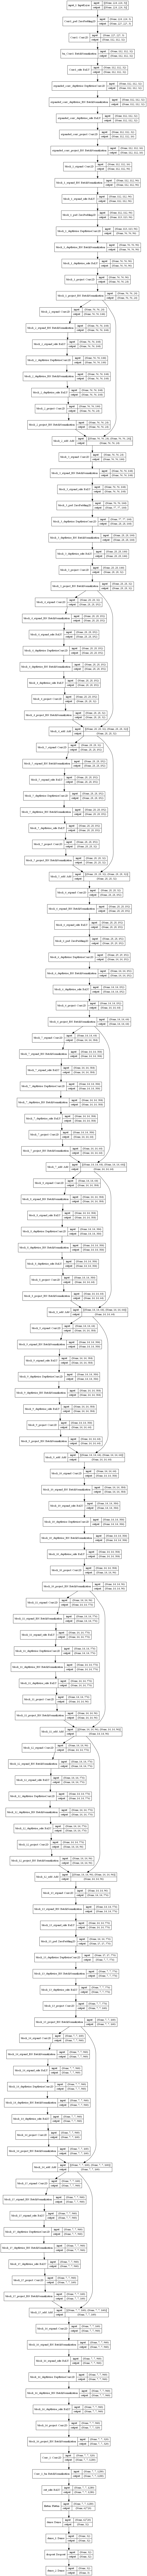

In [38]:
#plot model - needed to install pydot and pydotplus
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot

plot_model(model, to_file= 'convnet_MOBILE.png', show_shapes=True, show_layer_names = True)
Image(filename = 'convnet_MOBILE.png')

In [39]:
recall = keras.metrics.Recall()

### Compile Model

In [40]:
#compile model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#opt = SGD(learning_rate=0.4)
INIT_LR = 1e-4
EPOCHS = 128
#BS = 16
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=[recall])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Implementing early stopping using callback in .fit()

In [41]:
#from keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 5)
# callbacks = [es]

### Training the cnn model 

In [42]:
H = model.fit(
        train_generator,
        steps_per_epoch=10,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=10,
        class_weight = class_weight)

Epoch 1/128
10/10 [==============================] - 26s 3s/step - loss: 1.3073 - recall_1: 0.3538 - val_loss: 0.9675 - val_recall_1: 0.3529
Epoch 2/128
10/10 [==============================] - 26s 3s/step - loss: 0.9697 - recall_1: 0.3853 - val_loss: 0.8450 - val_recall_1: 0.4280
Epoch 3/128
10/10 [==============================] - 24s 2s/step - loss: 1.0614 - recall_1: 0.4603 - val_loss: 0.7247 - val_recall_1: 0.4740
Epoch 4/128
10/10 [==============================] - 25s 3s/step - loss: 0.8355 - recall_1: 0.4888 - val_loss: 0.8816 - val_recall_1: 0.4912
Epoch 5/128
10/10 [==============================] - 25s 2s/step - loss: 0.8908 - recall_1: 0.4952 - val_loss: 0.6882 - val_recall_1: 0.5046
Epoch 6/128
10/10 [==============================] - 25s 2s/step - loss: 0.8043 - recall_1: 0.5135 - val_loss: 0.8940 - val_recall_1: 0.5221
Epoch 7/128
10/10 [==============================] - 24s 2s/step - loss: 0.8175 - recall_1: 0.5275 - val_loss: 0.7160 - val_recall_1: 0.5316
Epoch 8/128
1

Epoch 59/128
10/10 [==============================] - 26s 3s/step - loss: 0.4755 - recall_1: 0.7106 - val_loss: 0.9481 - val_recall_1: 0.7103
Epoch 60/128
10/10 [==============================] - 26s 3s/step - loss: 0.4028 - recall_1: 0.7107 - val_loss: 0.9045 - val_recall_1: 0.7105
Epoch 61/128
10/10 [==============================] - 26s 3s/step - loss: 0.4800 - recall_1: 0.7105 - val_loss: 0.7578 - val_recall_1: 0.7104
Epoch 62/128
10/10 [==============================] - 26s 3s/step - loss: 0.3543 - recall_1: 0.7109 - val_loss: 0.4387 - val_recall_1: 0.7119
Epoch 63/128
10/10 [==============================] - 26s 3s/step - loss: 0.4257 - recall_1: 0.7129 - val_loss: 0.6571 - val_recall_1: 0.7130
Epoch 64/128
10/10 [==============================] - 27s 3s/step - loss: 0.6531 - recall_1: 0.7133 - val_loss: 0.5886 - val_recall_1: 0.7132
Epoch 65/128
10/10 [==============================] - 27s 3s/step - loss: 0.3772 - recall_1: 0.7140 - val_loss: 0.7820 - val_recall_1: 0.7143
Epoch 

10/10 [==============================] - 29s 3s/step - loss: 0.1647 - recall_1: 0.7603 - val_loss: 0.3413 - val_recall_1: 0.7609
Epoch 117/128
10/10 [==============================] - 28s 3s/step - loss: 0.1825 - recall_1: 0.7615 - val_loss: 0.4044 - val_recall_1: 0.7621
Epoch 118/128
10/10 [==============================] - 28s 3s/step - loss: 0.1249 - recall_1: 0.7628 - val_loss: 0.4108 - val_recall_1: 0.7632
Epoch 119/128
10/10 [==============================] - 28s 3s/step - loss: 0.1555 - recall_1: 0.7639 - val_loss: 0.3894 - val_recall_1: 0.7644
Epoch 120/128
10/10 [==============================] - 28s 3s/step - loss: 0.1518 - recall_1: 0.7650 - val_loss: 0.3947 - val_recall_1: 0.7654
Epoch 121/128
10/10 [==============================] - 28s 3s/step - loss: 0.2624 - recall_1: 0.7659 - val_loss: 0.5522 - val_recall_1: 0.7661
Epoch 122/128
10/10 [==============================] - 29s 3s/step - loss: 0.2707 - recall_1: 0.7665 - val_loss: 0.5676 - val_recall_1: 0.7667
Epoch 123/128

### Evaluate model

In [43]:
test_loss, test_acc = model.evaluate(test_generator)

67/67 [==============================] - 126s 2s/step - loss: 0.5549 - recall_1: 0.7737


In [44]:
#import numpy as np
predictions_mobile = model.predict(test_generator)
preds_mobile = np.argmax(predictions_mobile, axis=1)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix - MobileNetV2")
cm_mobile = confusion_matrix(test_generator.classes, preds_mobile)
print(cm_mobile)
print('Classification Report - MobileNetV2')
target_names = ['mask', 'no_mask', 'incorrect_mask']
print(classification_report(test_generator.classes, preds_mobile, target_names=target_names))

Confusion Matrix - MobileNetV2
[[671  26  65]
 [  8 572  76]
 [162  94 466]]
Classification Report - MobileNetV2
                precision    recall  f1-score   support

          mask       0.80      0.88      0.84       762
       no_mask       0.83      0.87      0.85       656
incorrect_mask       0.77      0.65      0.70       722

      accuracy                           0.80      2140
     macro avg       0.80      0.80      0.80      2140
  weighted avg       0.80      0.80      0.79      2140



In [ ]:
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(model, X_test, y_test)  # doctest: +SKIP

In [92]:
#import packes for plotting
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
# plot confusion matrix from keras model
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print("\n\n\n")

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.88057743 0.03412073 0.08530184]
 [0.01219512 0.87195122 0.11585366]
 [0.22437673 0.13019391 0.64542936]]






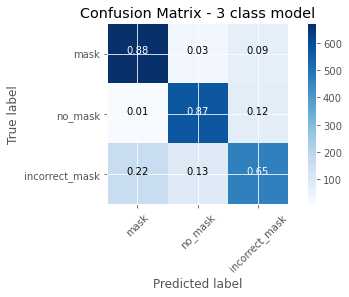

In [94]:
plot_confusion_matrix(cm=cm_mobile, classes=target_names, normalize=True, title='Confusion Matrix - 3 class model')


### Visualisation

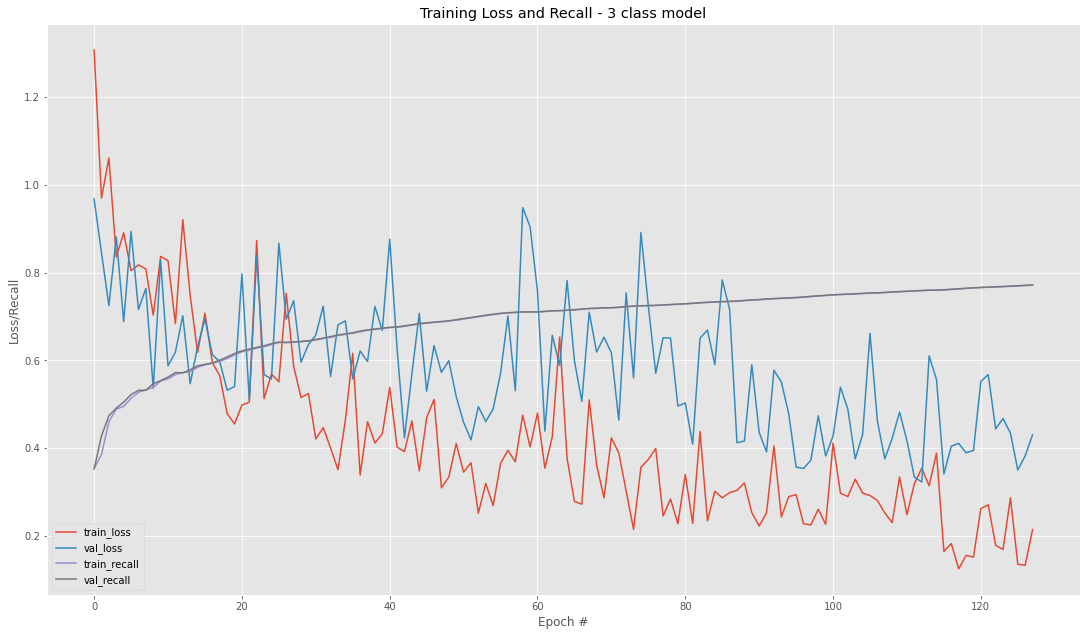

In [96]:
import matplotlib.pyplot as plt
N = EPOCHS
plt.style.use("ggplot")
#plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["recall_1"], label="train_recall")
plt.plot(np.arange(0, N), H.history["val_recall_1"], label="val_recall")
plt.title("Training Loss and Recall - 3 class model")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Recall")
plt.legend(loc="lower left")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('loss_recall_13.png', dpi=100)

### Save model as .h5 for flask

In [48]:
model.save("./MobileNet_models/model_mobilenet_13_good.h5")

In [49]:
#model.save("./MobileNet_models/model_mobilenet_9.tflite")

### Visualising predictions to check how model is working

In [50]:
#create a vector of images to test - using mask for now
from PIL import Image
import glob

mask_test = []
for filename in glob.glob('./data_3class/test/mask/*.png'): 
    im=Image.open(filename)
    mask_test.append(im)
    
no_mask_test = []
for filename in glob.glob('./data_3class/test/no_mask/*.png'): 
    im=Image.open(filename)
    no_mask_test.append(im)
    
incorrect_mask_test = []
for filename in glob.glob('./data_3class/test/incorrect_mask/*.png'): 
    im=Image.open(filename)
    incorrect_mask_test.append(im)

In [51]:
from PIL import Image
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt

def get_label(label_map, pred):
    '''Takes a numeric prediction and converts it to a label using dict'''
    for l in label_map:
        if label_map.get(l) == pred:
            return l
    return no_label

def predict_label(img, model):
   #np_image = Image.open(filename)
   np_image = np.array(img).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224, 3))
   np_image = np.expand_dims(np_image, axis=0)
   pred = model.predict(np_image)
   class_pred = pred.argmax(axis = -1)
   return get_label(train_generator.class_indices, class_pred)

def predict_on_image(img, model):
    print(predict_label(img, model))
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()

mask


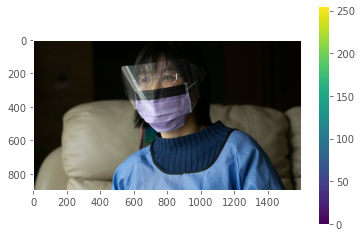

In [52]:
predict_on_image(mask_test[1], model)

mask


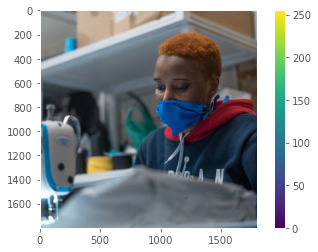

In [53]:
predict_on_image(mask_test[2], model)

mask


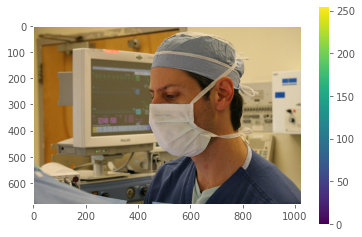

In [54]:
predict_on_image(mask_test[3], model)

mask


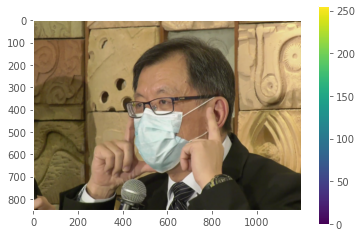

In [55]:
predict_on_image(mask_test[4], model)

no_mask


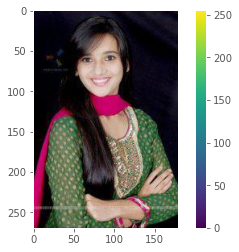

In [56]:
predict_on_image(no_mask_test[0], model)

incorrect_mask


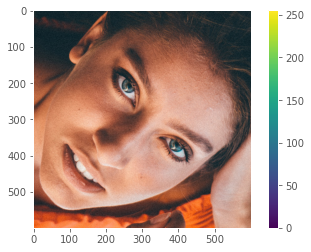

In [57]:
predict_on_image(no_mask_test[1], model)

no_mask


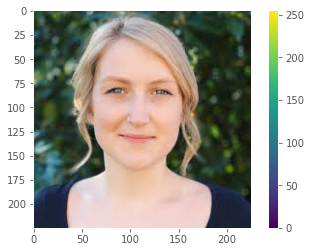

In [58]:
predict_on_image(no_mask_test[2], model)

no_mask


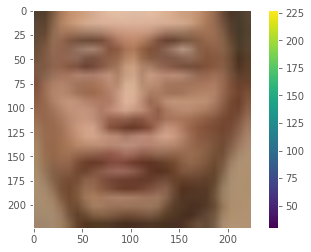

In [59]:
predict_on_image(no_mask_test[10], model)

mask


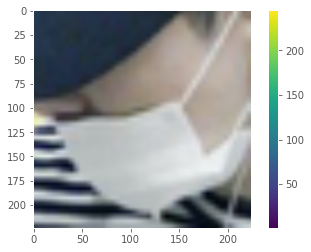

In [60]:
predict_on_image(incorrect_mask_test[0], model)

incorrect_mask


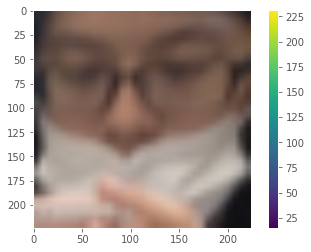

In [61]:
predict_on_image(incorrect_mask_test[5], model)

incorrect_mask


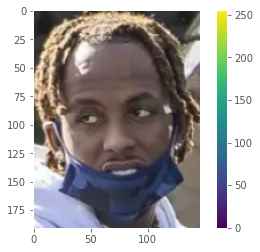

In [62]:
predict_on_image(incorrect_mask_test[8], model)

mask


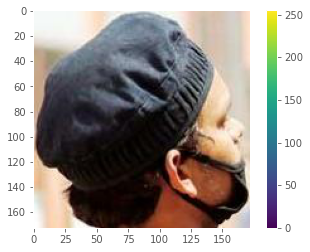

In [63]:
predict_on_image(incorrect_mask_test[13], model)

In [64]:
#get predictions for incorrect_mask
for i in range(len(incorrect_mask_test)):
    print(predict_label(incorrect_mask_test[i], model))

mask
no_mask
incorrect_mask
incorrect_mask
mask
incorrect_mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
mask
incorrect_mask
mask
incorrect_mask
incorrect_mask
no_mask
incorrect_mask
mask
mask
mask
mask
no_mask
incorrect_mask
mask
incorrect_mask
mask
mask
mask
mask
incorrect_mask
incorrect_mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
mask
mask
incorrect_mask
incorrect_mask
no_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
no_mask
mask
incorrect_mask
incorrect_mask
mask
incorrect_mask
no_mask
incorrect_mask
incorrect_mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
no_mask
mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
no_mask
incorrect_mask
incorrect_mask
no_mask
mask
incorrect_mask
incorrect_mask
no_

no_mask
no_mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
no_mask
incorrect_mask
incorrect_mask
incorrect_mask
mask
mask
mask
incorrect_mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
mask
mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
incorrect_mask
mask
mask
incorrect_mask
incorrect_mask
incorrect_mask
no_mask
mask
incorrect_mask


In [65]:
#get predictions for no_mask
for i in range(len(no_mask_test)):
    print(predict_label(no_mask_test[i], model))

no_mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
no_mask
incorrect_mask
no_mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
no_mask
incorrect_mask
no_mask
no_mask
no_mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
incorrect_mask
no_mask
no_mask
no_mask
no_mask
incorrect_mask
incorrect_mask
no_mask
mask
mask
incorrect_mask
incorrect_mask
i

In [66]:
#get predictions for mask
for i in range(len(mask_test)):
    print(predict_label(mask_test[i], model))

mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
no_mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
no_mask
mask
mask
incorrect_mask
incorrect_mask
mask
mask
no_mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
mask
incorrect_mask
mask
mask
no_mask
mask
mask
mask
mask
mask
mask
mask
no_mask
mask
mask
mask
mask
mask
mask
mask
mask


In [ ]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

from keras import backend as K

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


### Trying some optimisation of parameters and vis??

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# fit model with given number of nodes, returns test set accuracy
def evaluate_model(n_nodes, n_layers, class_weight, train_generator, validation_generator, test_generator):
    # configure the model based on the data
    #n_input, n_classes = trainX.shape[1], testy.shape[1]
    # define model
    image_size = 224
    n_classes = 3
    EPOCHS = 8
    INIT_LR = 1e-4
    baseModel = MobileNetV2(weights='imagenet', include_top=False,
                            input_shape=(image_size, image_size, 3))
    
    headModel = baseModel.output
    #headModel = Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_size, image_size, 3))(headModel)
    headModel = Flatten(name="flatten", input_shape=(image_size, image_size, 3))(headModel)
    #headModel = Dense(128, activation="relu")(headModel)
    #headModel = Dense(n_nodes, activation = "relu")(headModel)
    for _ in range(1, n_layers):
        headModel = Dense(n_nodes, activation='relu')(headModel)
    headModel = Dropout(0.3)(headModel)
    headModel = Dense(n_classes, activation="softmax")(headModel)
    
    #headModel = Dense(n_nodes, activation='relu')(headModel)
    #headModel = Dense(n_classes, activation='softmax')(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)
    #freeze layers
    for layer in baseModel.layers:
        layer.trainable = False
    # compile model
    #opt = SGD(lr=0.01, momentum=0.9)
    opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=[keras.metrics.Recall()])
    # fit model on train set
    history = model.fit(train_generator,
        steps_per_epoch=10,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=10,
        class_weight = class_weight)
    # evaluate model on test set
    _, test_acc = model.evaluate(test_generator)
    return history, test_acc
 


In [ ]:
from matplotlib import pyplot
# evaluate model and plot learning curve with given number of nodes
num_nodes = [16, 32, 64]
num_layers = [1,2,3]
for n_nodes in num_nodes:
    for n_layers in num_layers:
        # evaluate model with a given number of nodes
        history, result = evaluate_model(n_nodes, n_layers, class_weight, train_generator, validation_generator, test_generator)
        # summarize final test set accuracy
        print('nodes=%d, layers = %d: %.3f' % (n_nodes, n_layers, result))
        # plot learning curve
        pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
pyplot.legend()
pyplot.show()